In [1]:
from tensorflow.python.keras.applications import DenseNet121
from tensorflow.python.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.python.keras.models import Model
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy

# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [2]:
#메모리확인

import psutil
import os

print("=="*20)
print("== memory usage check")

for exec_num in range(0, 2):
    # BEFORE code
    print(f"== {exec_num:2d} exec")
    # general RAM usage
    memory_usage_dict = dict(psutil.virtual_memory()._asdict())
    memory_usage_percent = memory_usage_dict['percent']
    print(f"BEFORE CODE: memory_usage_percent: {memory_usage_percent}%")
    # current process RAM usage
    pid = os.getpid()
    current_process = psutil.Process(pid)
    current_process_memory_usage_as_KB = current_process.memory_info()[0] / 2.**20
    print(f"BEFORE CODE: Current memory KB   : {current_process_memory_usage_as_KB: 9.3f} KB")

    X = [i for i in range(0, 9000000)]
    # AFTER  code
    memory_usage_dict = dict(psutil.virtual_memory()._asdict())
    memory_usage_percent = memory_usage_dict['percent']
    print(f"AFTER  CODE: memory_usage_percent: {memory_usage_percent}%")
    # current process RAM usage
    pid = os.getpid()
    current_process = psutil.Process(pid)
    current_process_memory_usage_as_KB = current_process.memory_info()[0] / 2.**20
    print(f"AFTER  CODE: Current memory KB   : {current_process_memory_usage_as_KB: 9.3f} KB")
    del X
    print("--"*30)

== memory usage check
==  0 exec
BEFORE CODE: memory_usage_percent: 5.8%
BEFORE CODE: Current memory KB   :   304.348 KB
AFTER  CODE: memory_usage_percent: 7.5%
AFTER  CODE: Current memory KB   :   653.496 KB
------------------------------------------------------------
==  1 exec
BEFORE CODE: memory_usage_percent: 5.8%
BEFORE CODE: Current memory KB   :   306.125 KB
AFTER  CODE: memory_usage_percent: 7.5%
AFTER  CODE: Current memory KB   :   653.500 KB
------------------------------------------------------------


In [3]:
# backbone.layers[426]

In [4]:
# from tensorflow.python.keras.layers import BatchNormalization, Dropout

# backbone = DenseNet121(include_top=False, weights=None, input_shape=(224, 224, 3))
# backbone_out = backbone.output
# # backbone_out = Dropout(0.5)(backbone_out)
# gap = GlobalAveragePooling2D(name='pooling_layer')(backbone_out)
# output = Dense(units=7, activation='softmax', name='output_layer')(gap)
# chexnet_model = Model(inputs=backbone.input, outputs=output)

In [5]:
from tensorflow.python.keras.layers import BatchNormalization, Dropout

backbone = DenseNet121(input_shape=(224, 224, 3),
                      weights= None,
                      include_top=False)
x = backbone.output # fc layer 
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation="softmax")(x)
output = Dense(units=7, activation='softmax', name='output_layer')(x)

chexnet_model = Model(inputs=backbone.input, outputs=output)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


NameError: name 'num_classes' is not defined

In [10]:
# data = pd.read_csv('/home/ncp/workspace/data/dataset_.csv',index_col=0)

# dcm_list = list(data['orginal_dcm_file'])
# mask_path_list = list(data['body_part_file'])
# img_path_list = []

# for i in dcm_list:
#     png_img = i.replace('.dcm','.png')
#     img_path_list.append(png_img)

# def normal_dia(x):
#     if x == 9:
#         return 0
#     else:
#         return x
    
    
# data['diagnosis'] = data['diagnosis'].apply(normal_dia)

In [11]:
data = pd.read_csv('/home/ncp/workspace/data/dataset_.csv',index_col=0)

In [12]:
data.head(3)

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis
0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4
2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4


In [13]:
del_list = ['H05_02631_01.png',
 'H04_00289_02.png',
 'H04_02478_01.png',
 'H04_00262_02.png',
 'H01_00077_01.png',
 'H04_00255_01.png',
 'H04_00282_01.png',
 'H04_00283_02.png',
 'H03_02345_01.png',
 'H04_02490_02.png',
 'H03_02185_01.png',
 'H04_00329_01.png',
 'H13_00213_02.png',
 'H13_00081_02.png',
 'H04_02479_02.png',
 'H05_00991_01.png',
 'H05_00967_01.png',
 'H04_01830_01.png',
 'H03_02304_01.png',
 'H03_01436_01.png',
 'H13_01269_01.png',
 'H13_01253_02.png',
 'H13_01252_01.png',
 'H13_01395_02.png',
 'H13_01641_02.png',
 'H13_01792_01.png',
 'H13_01441_02.png',
 'H04_01313_01.png',
 'H05_00138_01.png',
 'H04_00133_01.png',
 'H05_00094_01.png',
 'H05_00201_02.png',
 'H03_00314_01.png',
 'H05_00115_02.png',
 'H05_00143_02.png',
 'H03_02251_01.png',
 'H13_00399_01.png',
 'H08_00121_01.png',
 'H07_02621_01.png',
 'H03_00241_01.png',
 'H04_02233_02.png',
 'H03_01694_01.png',
 'H09_02110_01.png',
 'H13_00289_01.png',
 'H05_01995_01.png',
 'H05_01354_01.png',
 'H08_01410_01.png',
 'H13_01149_02.png',
 'H03_00412_01.png',
 'H05_01936_01.png',
 'H13_01961_01.png',
 'H13_01231_01.png',
 'H09_01500_01.png',
 'H13_01229_01.png',
 'H04_02513_01.png',
 'H04_01124_01.png',
 'H05_01682_01.png',
 'H07_02264_01.png',
 'H08_00862_01.png',
 'H05_01814_01.png',
 'H05_01829_01.png',
 'H01_00252_01.png',
 'H13_01704_01.png',
 'H08_01353_01.png',
 'H07_01176_01.png',
 'H13_00513_02.png',
 'H13_01012_02.png',
 'H04_01583_01.png',
 'H03_00793_01.png',
 'H05_01653_01.png',
 'H03_01567_01.png',
 'H03_01599_02.png',
 'H09_01285_01.png',
 'H09_01443_01.png',
 'H04_01618_02.png',
 'H01_01186_01.png',
 'H05_01120_02.png',
 'H05_02284_01.png',
 'H05_01239_02.png',
 'H04_01266_01.png',
 'H02_01136_01.png',
 'H09_01671_01.png',
 'H02_01137_01.png',
 'H13_01703_01.png',
 'H01_01036_01.png',
 'H09_01680_01.png',
 'H02_01455_02.png',
 'H05_01173_02.png',
 'H13_01393_02.png',
 'H04_01293_01.png',
 'H04_01302_01.png',
 'H04_01218_01.png',
 'H04_01721_01.png',
 'H04_00355_01.png',
 'H13_01858_02.png',
 'H02_00619_01.png',
 'H09_03015_01.png',
 'H05_00337_01.png',
 'H01_00160_01.png',
 'H07_01029_02.png',
 'H07_01128_02.png',
 'H05_00559_01.png',
 'H08_01559_01.png',
 'H05_00285_01.png',
 'H13_02296_02.png',
 'H08_01225_01.png',
 'H05_00663_01.png',
 'H09_02976_01.png',
 'H04_02164_01.png',
 'H01_01499_01.png',
 'H09_03187_01.png',
 'H13_01466_01.png',
 'H07_01640_02.png',
 'H01_00155_01.png',
 'H01_00140_01.png',
 'H09_02961_01.png',
 'H01_01950_01.png',
 'H07_02788_01.png',
 'H04_00805_01.png',
 'H07_01117_01.png',
 'H02_00434_01.png',
 'H07_00186_02.png',
 'H09_03302_01.png',
 'H09_03478_01.png',
 'H07_01088_01.png',
 'H05_00568_01.png',
 'H05_00726_01.png',
 'H07_01207_01.png',
 'H08_01572_01.png',
 'H04_00523_01.png',
 'H01_00161_01.png',
 'H09_03143_01.png',
 'H09_03470_01.png',
 'H07_01112_01.png',
 'H07_01065_01.png',
 'H03_01505_02.png',
 'H05_00282_01.png',
 'H07_00977_02.png',
 'H05_00544_01.png',
 'H05_00747_01.png',
 'H08_01557_01.png',
 'H07_00091_01.png',
 'H07_00517_01.png',
 'H13_02021_01.png',
 'H08_00765_01.png']

In [14]:
del_list2 = []

for i in del_list:
    del_list2.append(i.replace('.png',''))

def find_iden(x):
    if x in del_list2:
        return 'Y'
    else:
        return 'N'

data['del?'] = data['identifier'].apply(find_iden)

In [15]:
data2 = data[data['del?'] =='N']

In [16]:
crop2_list=[]
crop_list = list(data2['crop_file'])

for i in crop_list:
    crop2_img = i.replace('crop/','crop_2/')
    crop2_list.append(crop2_img)

In [17]:
len(crop2_list)

3855

In [19]:
data2.head()

,identifier,sex,age_group,age,height,weight,report,pneumonia_type,orginal_dcm_file,orginal_png_file,crop_file,body_part_file,diagnosis,del?
0,H05_00019_02,M,A1,0개월,NaN,0.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00019_02.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4,N
1,H01_00716_01,F,A1,0개월,52.0,3.9,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H01_00716_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4,N
2,H03_00172_01,F,A1,0개월,42.0,1.8,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H03_00172_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4,N
3,H05_00204_01,M,A1,0개월,50.5,3.0,NaN,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H05_00204_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4,N
4,H04_00178_01,F,A1,0개월,30.0,0.5,Diffuse hazziness in both lungs. ETT insertion...,NaN,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,/home/ncp/workspace/data/crop/d4/H04_00178_01.png,/home/ncp/workspace/data/train/04.신생아호흡곤란증후군/A...,4,N


In [24]:
img_path_list = list(data2['orginal_png_file'])
mask_path_list = list(data2['body_part_file'])

In [34]:
crop_file_list = list(data2['crop_file'])
bitwise_path_list = []

for i in crop_file_list:
    a = i.replace('/crop','/DL')
    bitwise_path_list.append(a)

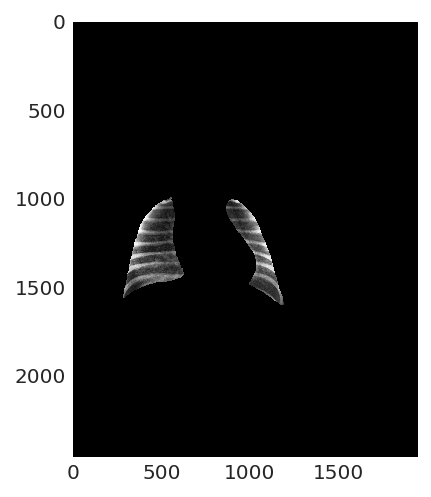

In [46]:
plt.imshow(cv2.imread(bitwise_path_list[2]))

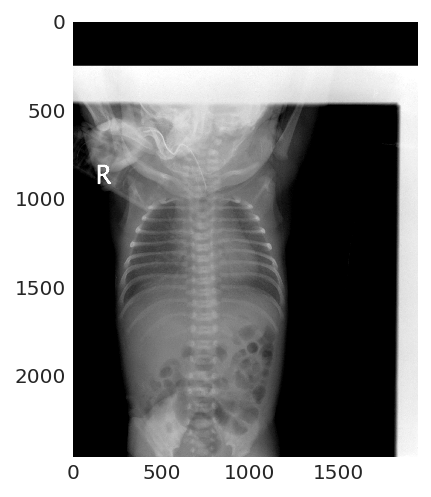

In [47]:
plt.imshow(cv2.imread(img_path_list[2]))

In [49]:
# for i in range(10):
#     plt.imshow(crop(img_path_list[i],bitwise_path_list[i]))
#     plt.show()

In [7]:

import numpy as np
import cv2

def cvt_crop(og_img_path, size):
    
    og_img = cv2.imread(og_img_path)
    
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(8,8))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    return cvt_img



def rv_3ch(og_img_path, mask_path, size):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(12,12))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = cv2.resize(mask, size)
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    return remove
#     print(remove.shape)
#     plt.imshow(remove)

In [55]:
# img= crop(img_path_list[2],bitwise_path_list[2])
# plt.imshow(img)

org_path= img_path_list[2]
bt_img_path= bitwise_path_list[2]


img= cv2.imread(org_path)
btimg= cv2.imread(bt_img_path)
# gray scale
btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
# threshold
_, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
# contour 잡기 (윤곽선은 투명)
contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
# len(contours)
# --------------------------------------------------------
# contour[i]의 x,y min,max
x_Min_list = []
y_Min_list = []
x_Max_list = []
y_Max_list = []

for i in range(len(contours)):
    stri = str(i)

    globals()['contours_min_{}'.format(i)] = np.argmin(contours[i], axis=0)
    globals()['contours_max_{}'.format(i)] = np.argmax(contours[i], axis=0)

    xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
    ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
    xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
    ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]

    x_Min_list.append(xmn)
    y_Min_list.append(ymn)
    x_Max_list.append(xmx)
    y_Max_list.append(ymx)

    x_Min = x_min_0
    y_Min = y_min_0
    x_Max = x_max_0
    y_Max = y_max_0


    for a in x_Min_list:
        if x_Min <a:
            x_Min = x_Min
        else:
            x_Min = a

    for b in y_Min_list:
        if y_Min <b:
            y_Min = y_Min
        else:
            y_Min = b

    for c in x_Max_list:
        if x_Max >c:
            x_Max = x_Max
        else:
            x_Max = c

    for d in y_Max_list:
        if y_Max >d:
            y_Max = y_Max
        else:
            y_Max = d



# #         sz= int((y_Max-y_Min)*0.2)
#     y_Min= int(y_Min-100)
#     y_Max= int(y_Max+100)
#     x_Min= int(x_Min-100)
#     x_Max= int(x_Max+100)

#     img_trim = img[y_Min:y_Max, x_Min:x_Max]

#     return img_trim

NameError: name 'x_min_0' is not defined

In [29]:
def crop(org_path,bt_img_path):
    try: 
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

        # --------------------------------------------------------
        # contour[i]의 x,y min,max
        x_Min_list = []
        y_Min_list = []
        x_Max_list = []
        y_Max_list = []

        for i in range(len(contours)):
            stri = str(i)

            globals()['contours_min_{}'.format(i)] = np.argmin(contours[i], axis=0)
            globals()['contours_max_{}'.format(i)] = np.argmax(contours[i], axis=0)

            xmn= contours[i][globals()['contours_min_{}'.format(i)][0][0]][0][0]
            ymn= contours[i][globals()['contours_min_{}'.format(i)][0][1]][0][1]
            xmx= contours[i][globals()['contours_max_{}'.format(i)][0][0]][0][0]
            ymx= contours[i][globals()['contours_max_{}'.format(i)][0][1]][0][1]

            x_Min_list.append(xmn)
            y_Min_list.append(ymn)
            x_Max_list.append(xmx)
            y_Max_list.append(ymx)

            x_Min = x_min_0
            y_Min = y_min_0
            x_Max = x_max_0
            y_Max = y_max_0

            for a in x_Min_list:
                if x_Min <a:
                    x_Min = x_Min
                else:
                    x_Min = a

            for b in y_Min_list:
                if y_Min <b:
                    y_Min = y_Min
                else:
                    y_Min = b

            for c in x_Max_list:
                if x_Max >c:
                    x_Max = x_Max
                else:
                    x_Max = c

            for d in y_Max_list:
                if y_Max >d:
                    y_Max = y_Max
                else:
                    y_Max = d

                
                
#         sz= int((y_Max-y_Min)*0.2)
        y_Min= int(y_Min-100)
        y_Max= int(y_Max+100)
        x_Min= int(x_Min-100)
        x_Max= int(x_Max+100)
        
        img_trim = img[y_Min:y_Max, x_Min:x_Max]

        return img_trim
    #--------------------------------------------------------------------------------------------------------------------
    except Exception as e:
        img= cv2.imread(org_path)
        btimg= cv2.imread(bt_img_path)
        # gray scale
        btimg_gray  = cv2.cvtColor(btimg, cv2.COLOR_BGR2GRAY)
        # threshold
        _, bi_binary  = cv2.threshold(btimg_gray, 0, 255, cv2.THRESH_BINARY)
        # contour 잡기 (윤곽선은 투명)
        contours, hierarchy = cv2.findContours(bi_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
#         cv2.drawContours(image=mask, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)


        # --------------------------------------------------------
        # contour[0]의 x,y min,max
        contours_min_0 = np.argmin(contours[0], axis=0)
        contours_max_0 = np.argmax(contours[0], axis=0)

        x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
        y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
        x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
        y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

        x_Max = int(x_Max_0+abs(x_Max_0-x_Min_0)*1.5)
        
#         sz= int((y_Max_0-y_Min_0)*0.2)
        y_Min= int(y_Min_0-10)
        y_Max= int(y_Max_0+10)
        x_Min= int(x_Min_0-10)
        x_Max= int(x_Max+10)

        img_trim = img[y_Min_0:y_Max_0, x_Min_0:x_Max]

        return img_trim

In [8]:
rv_3ch(img_path_list[0], mask_path_list[0], (224,224))

NameError: name 'img_path_list' is not defined

In [15]:
img_list = list(data2['orginal_png_file'])

In [16]:
X = np.ndarray((3855,224,224,3))

for i in range(len(X)):
#     X[i][:][:][:] = rv_3ch(img_path_list[i], mask_path_list[i], (224,224))
      X[i][:][:][:] = cvt_crop(img_list[i], (224,224)).astype(np.uint8)
    
y = np.array(data2['diagnosis'])

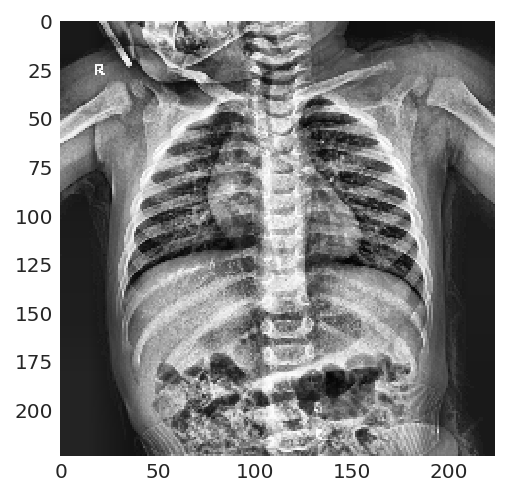

In [56]:
plt.imshow(Xtr[3].astype(np.uint8))

In [17]:
X.shape

(3855, 224, 224, 3)

In [18]:
from sklearn.model_selection import train_test_split

Xtr, Xva, Ytr, Yva = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
Xva, Xtst, Yva, Ytst = train_test_split(Xva,Yva, test_size=0.5, random_state=42, stratify=Yva)

In [19]:
from tensorflow.python.keras.utils import to_categorical

Ytr_c = to_categorical(Ytr)
Yva_c = to_categorical(Yva)
Ytst_c = to_categorical(Ytst)

In [20]:
print(Xtr.shape ,'/', Ytr.shape ,'/', Ytr_c.shape)
print(Xva.shape ,'/', Yva.shape ,'/', Yva_c.shape)
print(Xtst.shape ,'/', Ytst.shape ,'/', Ytst_c.shape)

(3084, 224, 224, 3) / (3084,) / (3084, 7)
(385, 224, 224, 3) / (385,) / (385, 7)
(386, 224, 224, 3) / (386,) / (386, 7)


In [21]:
del X

In [22]:
# 이미지 증식

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


# data_gen_args = dict(horizontal_flip=True, vertical_flip = True, rotation_range = 10)
# image_datagen = ImageDataGenerator(**data_gen_args)
image_datagen = ImageDataGenerator(
#       rescale=1./255,
      rotation_range=10,
      width_shift_range=0.1, 
      height_shift_range=0.1,
      shear_range=0.1,       
      zoom_range=0.05,        
      horizontal_flip=False,
      fill_mode='nearest')

seed = 1

train_dir= '/home/ncp/workspace/data/dl_train/'
val_dir= '/home/ncp/workspace/data/dl_val/'

train_generator = image_datagen.flow_from_directory(
    train_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 20)


validation_generator = image_datagen.flow_from_directory(
    val_dir,
    target_size = (224, 224),
    class_mode = 'categorical',
    batch_size = 20)




Found 3208 images belonging to 7 classes.
Found 160 images belonging to 7 classes.


In [23]:
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator


#data augmentation 

# Create two instances (images and targets) with the same arguments
data_gen_args = dict(horizontal_flip=True, vertical_flip = True, rotation_range = 10)
image_datagen = ImageDataGenerator(**data_gen_args)
# mask_datagen = ImageDataGenerator(**data_gen_args)

# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

train_generator = image_datagen.flow(x=Xtr, y=Ytr_c,
                                    batch_size=32,
                                    shuffle=True)
validation_generator = image_datagen.flow(x=Xva,y=Yva_c,
                                         batch_size=32,
                                         shuffle=True)


In [24]:
from tensorflow.python.keras import backend as K
import tensorflow.python as tf
from sklearn.metrics import classification_report

# #---------------클래스별 매트릭스 ---------------------------
# def each_f1score(y_target, y_pred):
#     y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
#     y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
#     target_names = [0,1,2,3,4,5,6]
#     return classification_report(y_target_yn, y_pred_yn, target_names=target_names)
# # print(classification_report(y_target_yn, y_pred_yn, target_names=target_names))
# #---------------------------------------------------------

def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

class_weight = {0:0.571428563,
                1:1.397990367,
                2:4.617604545,
                3:1.662337636,
                4:0.892857129,
                5:0.571428563,
                6:1.181247674}


from tensorflow.python.keras.optimizers import SGD


# chexnet_model.compile( 
#     optimizer= 'adam', 
#     loss='categorical_crossentropy', 
# #     metrics=[tf.keras.metrics.CategoricalAccuracy()])
#     metrics=['accuracy',recall,precision,f1score])

# metrics=['accuracy',precision,f1score,each_f1score])


# chexnet_model.compile( 
#   optimizer= 'adam', 
#   loss=f1_loss, 
#   metrics=['accuracy',f1])

 
# class_weights = class_weight.compute_class_weight(
#                 'balanced',
#                  np.unique(train_generator.classes), 
#                  train_generator.classes)

chexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score])
# del X

In [25]:
from tensorflow.python.keras.callbacks import ModelCheckpoint,EarlyStopping
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# early_stop = EarlyStopping(monitor='f1score', mode='max' ,min_delta=0.01 ,
#                            patience=10 ,verbose=1 ,restore_best_weights=True)
# checkpointer = ModelCheckpoint('/home/ncp/workspace/chex_model.hdf5', monitor='f1score' ,
#                                mode='max', verbose=1,save_best_only=True ,save_weights_only=False) 


#---------------------------------------------------------------------------------

# early_stop = EarlyStopping(monitor='val_loss', mode='min' ,min_delta=0.01 ,
#                            patience=10 ,verbose=0 ,restore_best_weights=True)
checkpointer = ModelCheckpoint('/home/ncp/workspace/org_image_chexnet.hdf5', monitor='val_f1score' ,
                               mode='max', verbose=0,save_best_only=True ,save_weights_only=False) 


In [26]:
# chexnet_model.compile(optimizer='nadam', loss='binary_crossentropy',metrics=['acc'])
import tensorflow as tf

# history = chexnet_model.fit(Xtr,Ytr_c, validation_data=[Xva,Yva_c],batch_size=32, epochs=20)
history2 = chexnet_model.fit_generator(train_generator, validation_data=validation_generator, epochs=150,
                                       steps_per_epoch = 3, class_weight = class_weight,
                                      callbacks=[checkpointer])

Instructions for updating:
Use tf.cast instead.
Epoch 1/150
97/97 [==============================] - 495s 5s/step - loss: 0.4030 - acc: 0.8558 - precision: 0.4589 - recall: 0.0416 - f1score: 0.0745 - val_loss: 0.9868 - val_acc: 0.7981 - val_precision: 0.2462 - val_recall: 0.2139 - val_f1score: 0.2288
Epoch 2/150
97/97 [==============================] - 49s 507ms/step - loss: 0.3827 - acc: 0.8584 - precision: 0.5061 - recall: 0.0567 - f1score: 0.1001 - val_loss: 2.3249 - val_acc: 0.7878 - val_precision: 0.2251 - val_recall: 0.2139 - val_f1score: 0.2193
Epoch 3/150
97/97 [==============================] - 49s 507ms/step - loss: 0.3700 - acc: 0.8596 - precision: 0.5912 - recall: 0.0746 - f1score: 0.1301 - val_loss: 2.8802 - val_acc: 0.7477 - val_precision: 0.1046 - val_recall: 0.1034 - val_f1score: 0.1040
Epoch 4/150
97/97 [==============================] - 51s 524ms/step - loss: 0.3635 - acc: 0.8604 - precision: 0.5881 - recall: 0.0911 - f1score: 0.1560 - val_loss: 3.1195 - val_acc: 0.78

In [ ]:
history = chexnet_model.fit(Xtr,Ytr_c , validation_data=[Xva, Yva_c], batch_size=8, epochs = 120)

In [27]:
chexnet_model.load_weights('/home/ncp/workspace/org_image_chexnet.hdf5')

In [28]:
chexnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', precision, recall, f1score])

In [29]:
# evaluate model with sklearn
from sklearn.metrics import classification_report

predictions_last_epoch = chexnet_model.predict(Xtst, batch_size=8, verbose=1)
target_names = [0,1,2,3,4,5,6]
predicted_classes = np.argmax(predictions_last_epoch, axis=1)
print('\n')

print(classification_report(np.argmax(Ytst_c), predicted_classes, 
        target_names=target_names))

# print(classification_report(y_test, predicted_classes, 
#         target_names=target_names, digits = 6))   # digits이 먼지 모름

386/386 [==============================] - 8s 20ms/sample




TypeError: Singleton array 1 cannot be considered a valid collection.

In [ ]:
pred = chexnet_model.predict(Xtst)

In [30]:
from tensorflow.python.keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [32]:
_loss, _acc, _precision, _recall, _f1score = chexnet_model.evaluate(Xtst, Ytst_c, batch_size=32, verbose=1)
print('loss: {:.3f}, accuracy: {:.3f}, precision: {:.3f}, recall: {:.3f}, f1score: {:.3f}'.format(_loss, _acc, _precision, _recall, _f1score))

386/386 [==============================] - 2s 5ms/sample - loss: 0.7126 - acc: 0.8649 - precision: 0.4919 - recall: 0.4712 - f1score: 0.4811
loss: 0.713, accuracy: 0.865, precision: 0.492, recall: 0.471, f1score: 0.481


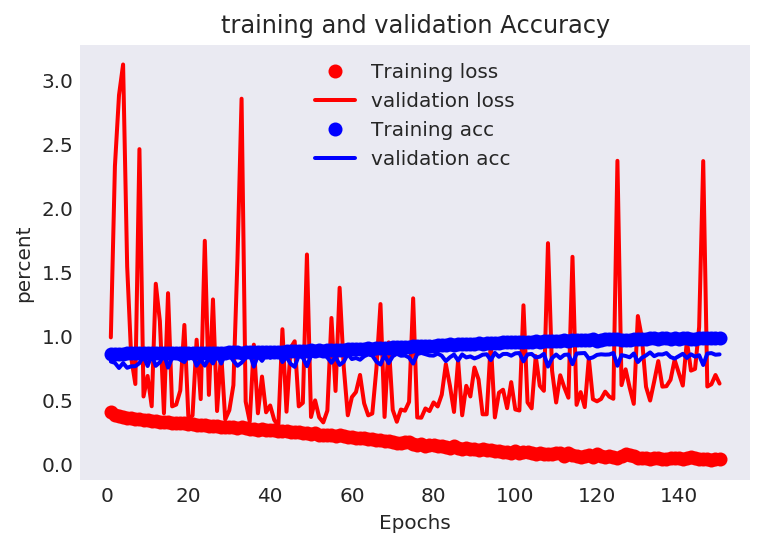

In [33]:
import matplotlib.pyplot as plt
loss = history2.history['loss']
val_loss = history2.history['val_loss']
plt.clf()

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label = 'Training loss', color='red')
plt.plot(epochs, val_loss, 'b', label = 'validation loss', color='red')
plt.title('training and validation loss')


acc= history2.history['acc']
val_acc = history2.history['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label = 'validation acc')
plt.title('training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('percent')
plt.legend()
plt.show()

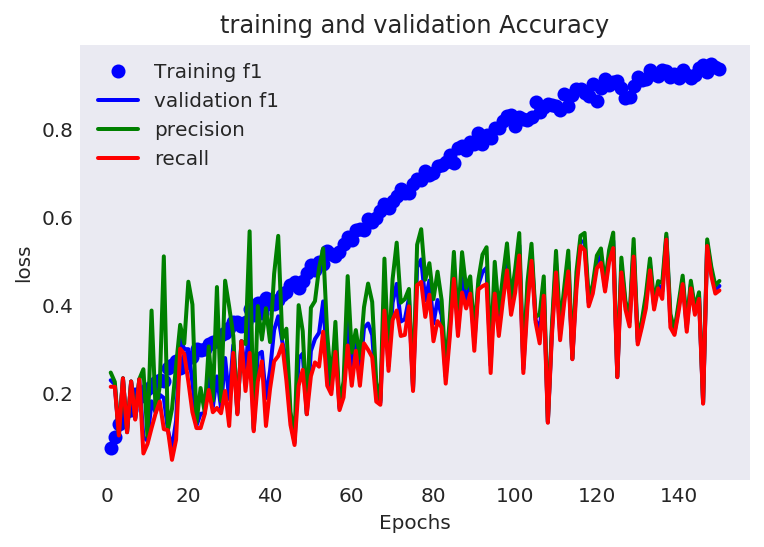

In [34]:
plt.clf()
f1= history2.history['f1score']
val_f1 = history2.history['val_f1score']
val_pre= history2.history['val_precision']
val_recall = history2.history['val_recall']
plt.plot(epochs, f1, 'bo', label='Training f1')
plt.plot(epochs, val_f1, 'b', label = 'validation f1')
plt.plot(epochs, val_pre, 'b', label='precision' , color='green')
plt.plot(epochs, val_recall, 'b', label = 'recall', color='red')

plt.title('training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [36]:
pred = chexnet_model.predict(Xtst)

In [37]:
print(pred.shape)
print(Ytst_c.shape)

(386, 7)
(386, 7)


In [38]:
Ytst_c[0]

array([0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [39]:
pred[0]

array([9.9412078e-01, 3.4352602e-04, 7.3514523e-13, 1.3648049e-11,
       3.2961329e-03, 2.2391398e-03, 3.8583144e-07], dtype=float32)

In [40]:
from tensorflow.python.keras import metrics

metrics.binary_accuracy(Ytst_c, pred, threshold=0.5)

<tf.Tensor 'Mean:0' shape=(386,) dtype=float32>

In [41]:
chexnet_model.evaluate(Xtst, Ytst_c, batch_size=16)

386/386 [==============================] - 3s 7ms/sample - loss: 0.7126 - acc: 0.8649 - precision: 0.5116 - recall: 0.4900 - f1score: 0.5000


[0.7126174356035618, 0.86491483, 0.5115879, 0.49, 0.499982]

In [42]:
ytst_a = np.asarray(Ytst_c).argmax(axis=1)
pred_a = np.asarray(pred).argmax(axis=1)

In [43]:
pred_a

array([0, 4, 4, 1, 5, 0, 4, 5, 4, 0, 4, 6, 0, 6, 0, 4, 5, 4, 5, 2, 6, 1,
       6, 0, 4, 1, 1, 1, 0, 4, 4, 5, 4, 1, 1, 5, 4, 6, 0, 4, 0, 4, 0, 3,
       4, 6, 5, 0, 0, 5, 4, 5, 4, 5, 0, 0, 0, 6, 1, 5, 0, 6, 0, 4, 0, 6,
       5, 0, 0, 1, 4, 0, 5, 4, 5, 0, 4, 0, 0, 0, 5, 5, 5, 0, 5, 6, 5, 5,
       0, 5, 4, 5, 6, 0, 4, 4, 0, 5, 4, 1, 4, 5, 0, 0, 0, 0, 6, 0, 4, 6,
       5, 0, 4, 0, 0, 0, 6, 4, 4, 4, 0, 4, 6, 3, 0, 5, 5, 5, 0, 1, 5, 4,
       5, 4, 0, 4, 6, 0, 4, 0, 4, 4, 1, 4, 1, 0, 5, 4, 6, 1, 0, 0, 4, 5,
       0, 0, 4, 0, 5, 6, 6, 0, 5, 0, 0, 0, 6, 0, 4, 0, 5, 6, 5, 4, 6, 5,
       4, 0, 0, 0, 4, 4, 1, 5, 0, 4, 6, 4, 4, 0, 5, 0, 0, 4, 0, 5, 1, 0,
       0, 0, 4, 1, 6, 0, 0, 4, 4, 5, 0, 0, 5, 0, 6, 0, 1, 4, 0, 5, 6, 0,
       4, 0, 1, 0, 4, 6, 0, 4, 4, 4, 4, 5, 0, 6, 0, 6, 1, 5, 4, 1, 5, 0,
       4, 0, 4, 5, 0, 0, 0, 6, 4, 4, 6, 0, 6, 0, 4, 6, 4, 0, 1, 4, 4, 4,
       4, 0, 0, 4, 0, 6, 0, 5, 5, 6, 0, 0, 4, 3, 0, 1, 6, 0, 1, 0, 0, 4,
       0, 5, 1, 4, 6, 0, 5, 6, 0, 6, 6, 4, 0, 0, 5,

In [47]:
from sklearn.metrics import f1_score

f1_score(ytst_a, pred_a, average='micro')

0.5207253886010362

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(ytst_a, pred_a)

0.5207253886010362

In [49]:
from sklearn.metrics import confusion_matrix

predictions_one_hot = chexnet_model.predict(Xtst)
cm = confusion_matrix(Ytst_c.argmax(axis=1), predictions_one_hot.argmax(axis=1))
print(cm)

[[64  6  1  1 10  7  6]
 [ 6 19  0  0  9  0  5]
 [ 9  1  0  0  0  1  1]
 [10  0  0  3  1 13  6]
 [ 1  1  0  0 60  1  0]
 [28  8  0  0 11 33 17]
 [13  0  0  1  3  8 22]]


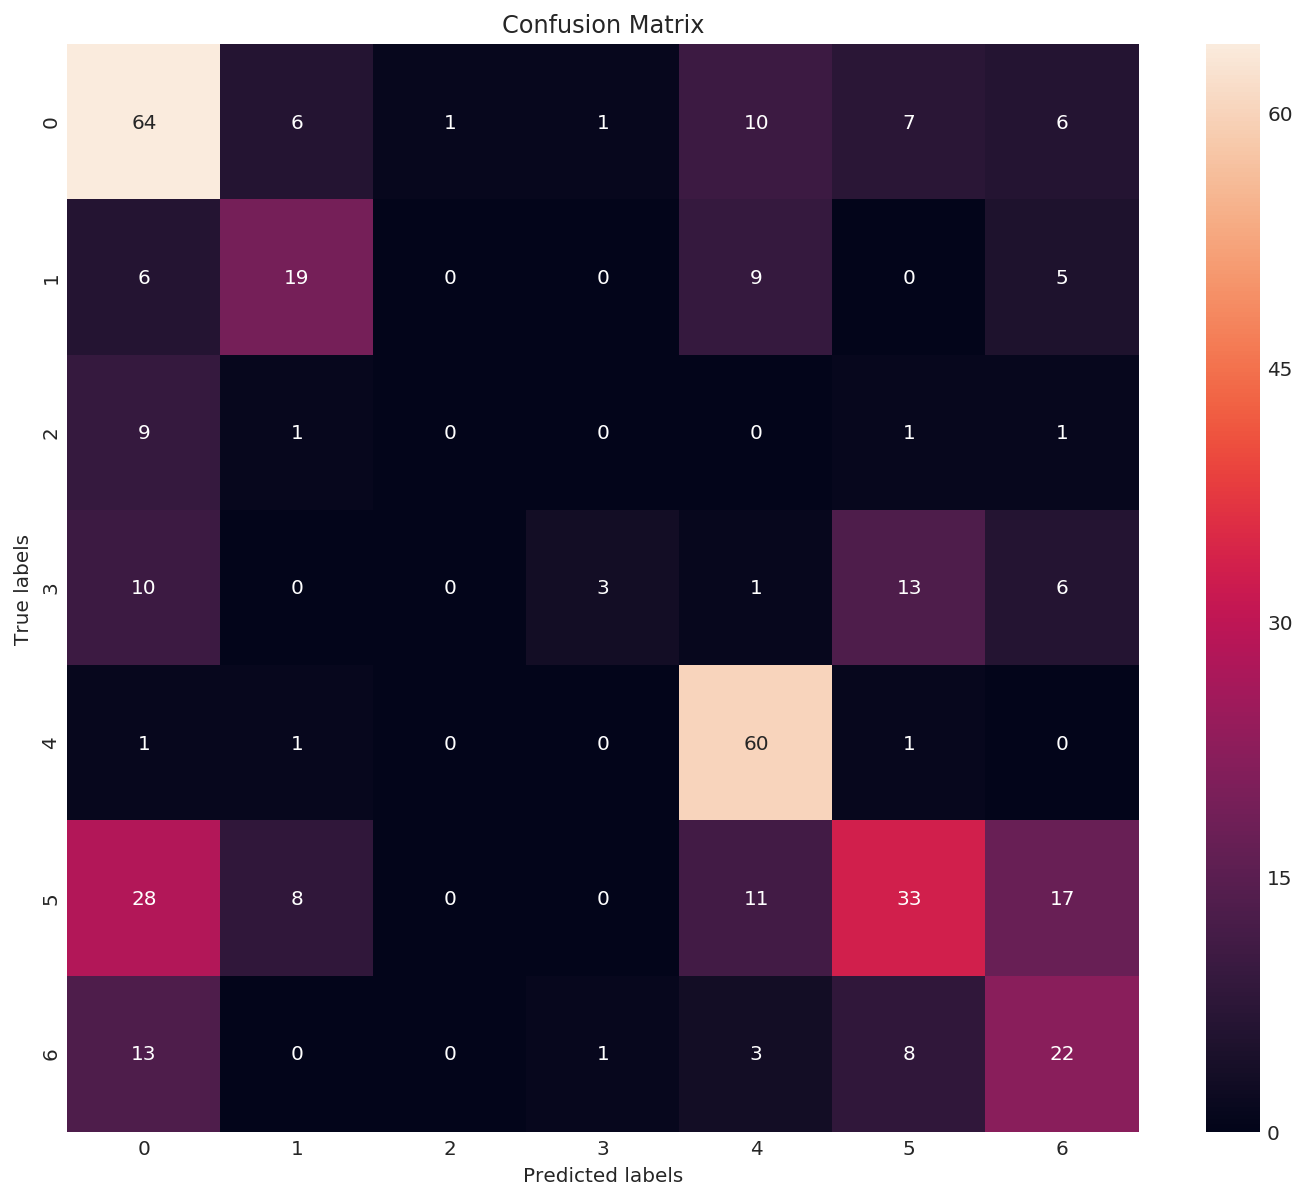

<Figure size 1080x720 with 0 Axes>

In [50]:
import seaborn as sns

plt.figure(figsize=(12,10))
T5_lables = ['0','1','2','3','4','5','6']    

ax= plt.subplot()

plt.figure(figsize=(15,10))
cm = confusion_matrix(np.asarray(Ytst_c).argmax(axis=1), np.asarray(pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(T5_lables); ax.yaxis.set_ticklabels(T5_lables);


# 승해

In [51]:
# class별로 f1score
# https://datascience.stackexchange.com/questions/58822/how-do-i-calculate-the-range-of-a-f1-score-from-a-confusion-matrix-of-3-class-a
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
import pandas as pd
from sklearn.metrics import classification_report


target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6']

print(classification_report(ytst_a, pred_a, target_names=target_names))
# aaa= pd.DataFrame(classification_report(y_true, y_pred, target_names=target_names))
# aaa

              precision    recall  f1-score   support

     class 0       0.49      0.67      0.57        95
     class 1       0.54      0.49      0.51        39
     class 2       0.00      0.00      0.00        12
     class 3       0.60      0.09      0.16        33
     class 4       0.64      0.95      0.76        63
     class 5       0.52      0.34      0.41        97
     class 6       0.39      0.47      0.42        47

    accuracy                           0.52       386
   macro avg       0.45      0.43      0.41       386
weighted avg       0.51      0.52      0.48       386



In [ ]:
from sklearn.metrics import classification_report

predictions_last_epoch = 
target_names = [0,1,2,3,4,5,6]chexnet_model.predict(Xtst, batch_size=batch_size, verbose=1)

predicted_classes = np.argmax(predictions_last_epoch, axis=1)
print('\n')
 precision    recall  f1-score   support

     class 0   
print(classification_report(y_test, predicted_classes, 
        target_names=target_names))